<a href="https://colab.research.google.com/github/FreddyR424/Deep_Learning/blob/master/MNIST_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion MNIST Image Classification**
- we will work with the fashion MNIST dataset to carry out a classification exercise using Artificial Neural Networks.

## **Info About the Dataset**
- Fashion MNIST, is a collection of apparel images falling into several classes. These classes are numbered from 0 to 9 and have the following meanings: A T-shirt/Top represented as 0 and an Ankle Boot as 9.

- class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## **Objective**
- create a simple ANN model to classify the images into 10 categories.

## **Imports**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Collecting the Data**

In [2]:
(X_train, trainY), (X_test, testY) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
X_train.shape[1] * X_train.shape[2]

784

#### **Observations**
- Accordingly, there are 60000 images of size 28x28 in the training set and 10000 images of size 28x28 in the test set.

In [5]:
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

- This suggests that the train set has 10 classes where each class denotes one type of apparel.

## **Encoding Target Variable**
- We need to one hot encode the target variable to be able to form the training target vector.

In [6]:
y_train = tf.keras.utils.to_categorical(trainY, num_classes = 10)
y_test = tf.keras.utils.to_categorical(testY, num_classes = 10)

# Let's have a look at the shapes of all the sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [7]:
# Normalize the dataset.
X_train = X_train/255
X_test = X_test/255

## **Visualization**
- Visualizing the first 24 images in the training dataset.

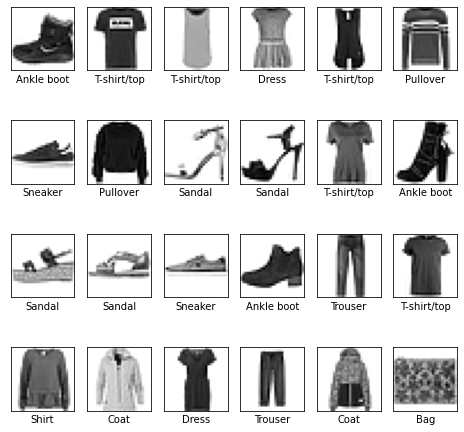

In [8]:
class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize = (8, 8))

for i in range(24):
    plt.subplot(4, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names_list[trainY[i]])
    
plt.show()

## **Model Building**
- Create a model with:
- 1. A layer to flatten the input
- 2. A hidden layer with 64 nodes (you can play around with this number) and the 'relu' activation
- 3. Output layer with 10 nodes

In [9]:
model_1 = tf.keras.Sequential([
                               
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#### **Adam optimizer, CategoricalCrossentropy as the loss, and accuracy as the metric.**

In [10]:
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [11]:
# Fitting the model
fit_history = model_1.fit(X_train, y_train,validation_split = 0.1, verbose = 1, epochs = 10, batch_size = 64)

Epoch 1/10
844/844 [==============================] - 4s 3ms/step - loss: 0.5533 - accuracy: 0.8099 - val_loss: 0.4666 - val_accuracy: 0.8312
Epoch 2/10
844/844 [==============================] - 3s 3ms/step - loss: 0.4045 - accuracy: 0.8579 - val_loss: 0.3838 - val_accuracy: 0.8620
Epoch 3/10
844/844 [==============================] - 3s 3ms/step - loss: 0.3698 - accuracy: 0.8688 - val_loss: 0.3643 - val_accuracy: 0.8733
Epoch 4/10
844/844 [==============================] - 5s 6ms/step - loss: 0.3445 - accuracy: 0.8760 - val_loss: 0.3577 - val_accuracy: 0.8712
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3260 - accuracy: 0.8827 - val_loss: 0.3524 - val_accuracy: 0.8772
Epoch 6/10
844/844 [==============================] - 3s 3ms/step - loss: 0.3126 - accuracy: 0.8874 - val_loss: 0.3559 - val_accuracy: 0.8750
Epoch 7/10
844/844 [==============================] - 3s 3ms/step - loss: 0.2992 - accuracy: 0.8906 - val_loss: 0.3532 - val_accuracy: 0.8732
Epoch 

#### **Observations:**
- We can observe that the model's accuracy increases with the increase in the number of epochs.
- For 10 epochs, we are getting an accuracy of about 90% for the training data and about 88% for the validation data.

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


#### **Observations:**
- The summary of the model shows each layer's name, type, output shape, and the number of parameters at that particular layer.
- It also shows the total number of trainable and non-trainable parameters in the model. When a parameter is learned during training, it is called a trainable parameter, otherwise, it is called a non-trainable parameter.
- The Flatten layer simply flattens each image into a size of 784 (28*28) and there is no learning or training at this layer. Hence, the number of parameters is 0 for the Flatten layer.
- Each image in the form of 784 nodes would be the input for the 'dense' layer. Each node of the previous layer would be connected with each node of the current layer. Also, each connection has one weight to learn and each node has one bias. So, the total number of parameters are (784*64)+64 = 50,240.
- Similarly, the last layer - 'dense_1' has (64*10)+10 = 650 parameters.

## **Evaluate the model on the test set**
- Predict based on the test data.
- Create a function to print the classification report and confusion matrix.

In [13]:
def metrics_score(actual, predicted):

    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = class_names_list, yticklabels = class_names_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [14]:
model_1.evaluate(X_test, y_test, verbose = 1)

test_pred = np.argmax(model_1.predict(X_test), axis = -1)
test_pred

313/313 [==============================] - 1s 3ms/step


array([9, 2, 1, ..., 8, 1, 5])

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.72      0.85      0.78      1000
           3       0.89      0.88      0.88      1000
           4       0.79      0.80      0.80      1000
           5       0.97      0.96      0.97      1000
           6       0.79      0.54      0.64      1000
           7       0.94      0.95      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



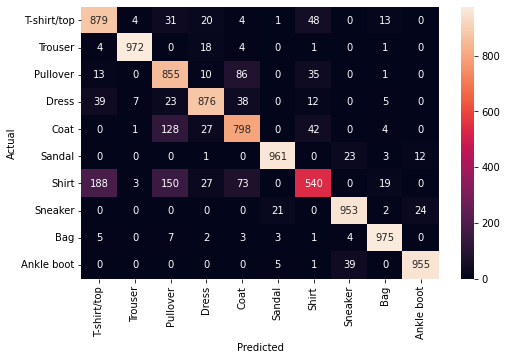

In [15]:
metrics_score(testY, test_pred)

#### **Observations:**
- For each class, a classification report shows the classification metrics - precision, recall, f1-score.
- We can see that class 1 (Trousers), class 7 (Sneaker), class 8 (Bag), class 9 (Ankle boot) have the highest f1-score. Even such a simple model can identify these objects quite appropriately.
- Class 6 (Shirt) has the lowest recall. The model is not able to identify the shirt. The confusion matrix shows that the model has predicted shirts as T-shirts/tops, Pullover, and Coat which is understandable as these items have similar looks.
- Let's try changing the learning rate and train the model for more epochs and see if the model can identify subtle differences in different objects.

## **Further Iterations to model building**
- Change the learning rate and epochs and observe the effect on accuracy on the earlier network.
- Build a bigger network with the new learning rate and epochs.

In [16]:
# Initialize sequential model
model_2 = tf.keras.Sequential([
                               
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
fit_history_2 = model_2.fit(X_train, y_train, epochs = 30, validation_split = 0.1, batch_size = 64, verbose = 2)

Epoch 1/30
844/844 - 3s - loss: 0.5527 - accuracy: 0.8105 - val_loss: 0.4323 - val_accuracy: 0.8440 - 3s/epoch - 4ms/step
Epoch 2/30
844/844 - 3s - loss: 0.4135 - accuracy: 0.8554 - val_loss: 0.3994 - val_accuracy: 0.8568 - 3s/epoch - 3ms/step
Epoch 3/30
844/844 - 2s - loss: 0.3783 - accuracy: 0.8667 - val_loss: 0.4014 - val_accuracy: 0.8585 - 2s/epoch - 3ms/step
Epoch 4/30
844/844 - 2s - loss: 0.3528 - accuracy: 0.8743 - val_loss: 0.3621 - val_accuracy: 0.8747 - 2s/epoch - 3ms/step
Epoch 5/30
844/844 - 2s - loss: 0.3309 - accuracy: 0.8821 - val_loss: 0.3791 - val_accuracy: 0.8602 - 2s/epoch - 3ms/step
Epoch 6/30
844/844 - 2s - loss: 0.3174 - accuracy: 0.8860 - val_loss: 0.3571 - val_accuracy: 0.8745 - 2s/epoch - 3ms/step
Epoch 7/30
844/844 - 2s - loss: 0.3078 - accuracy: 0.8883 - val_loss: 0.3514 - val_accuracy: 0.8780 - 2s/epoch - 3ms/step
Epoch 8/30
844/844 - 3s - loss: 0.2954 - accuracy: 0.8916 - val_loss: 0.3379 - val_accuracy: 0.8798 - 3s/epoch - 3ms/step
Epoch 9/30
844/844 - 2s 

#### **Observations:**
- We can see that the accuracy of the training data has increased by ~3% but the accuracy on the validation set has increased only by ~1% as compared to the model trained with 10 epochs.
- This indicates that if we further increase the number of epochs while keeping everything else the same then the model might start to overfit.

In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


- The summary remains the same as the previous model because we have not changed anything about the structure of the NN.

### **Adding more nodes to the layer and adding another hidden layer.**

In [19]:
# Initialize sequential model
model_3 = tf.keras.Sequential([
                               
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

fit_history_3 = model_3.fit(X_train, y_train, epochs = 30, validation_split = 0.1, batch_size = 64, verbose = 1)

Epoch 1/30
844/844 [==============================] - 6s 6ms/step - loss: 0.5244 - accuracy: 0.8143 - val_loss: 0.4141 - val_accuracy: 0.8503
Epoch 2/30
844/844 [==============================] - 4s 4ms/step - loss: 0.3804 - accuracy: 0.8623 - val_loss: 0.3678 - val_accuracy: 0.8662
Epoch 3/30
844/844 [==============================] - 4s 4ms/step - loss: 0.3386 - accuracy: 0.8770 - val_loss: 0.3545 - val_accuracy: 0.8715
Epoch 4/30
844/844 [==============================] - 4s 4ms/step - loss: 0.3135 - accuracy: 0.8841 - val_loss: 0.3575 - val_accuracy: 0.8687
Epoch 5/30
844/844 [==============================] - 5s 5ms/step - loss: 0.2969 - accuracy: 0.8909 - val_loss: 0.3162 - val_accuracy: 0.8810
Epoch 6/30
844/844 [==============================] - 5s 7ms/step - loss: 0.2809 - accuracy: 0.8963 - val_loss: 0.3237 - val_accuracy: 0.8772
Epoch 7/30
844/844 [==============================] - 5s 6ms/step - loss: 0.2691 - accuracy: 0.8994 - val_loss: 0.3388 - val_accuracy: 0.8822
Epoch 

#### **Observations:**

- The validation accuracy of the model has further increased slightly, and the training accuracy has further increased by ~2%. So, there is still a hint of overfitting.
- We can play around with hyperparameters of the model or try different layer structures to improve the model performance and/or reduce the overfitting.

In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


#### **Observations:**
- We can see that the number of parameters has increased by ~2.15 times the number of parameters in previous models.
- Increasing the number of parameters can significantly increase the training time of the model.

### **Visualizing the loss and the accuracy on the train and the validation data for all three models.**

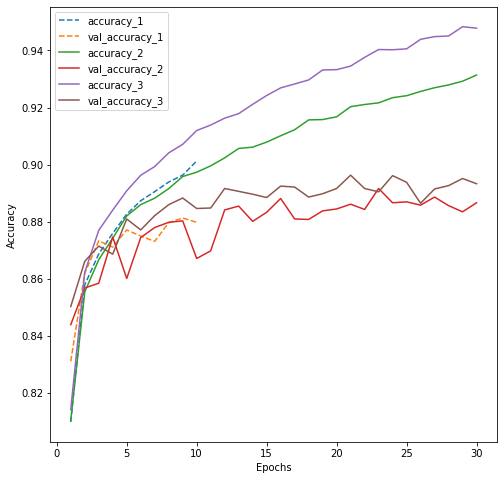

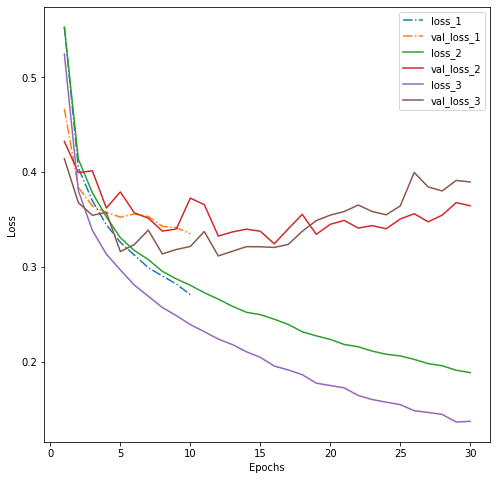

In [21]:
dict_hist = fit_history.history
dict_hist_2 = fit_history_2.history
dict_hist_3 = fit_history_3.history

list_ep = [i for i in range(1, 11)]
list_ep30 = [i for i in range(1, 31)]


plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy_1')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy_1')
plt.plot(list_ep30, dict_hist_2['accuracy'], label = 'accuracy_2')
plt.plot(list_ep30, dict_hist_2['val_accuracy'], label = 'val_accuracy_2')
plt.plot(list_ep30, dict_hist_3['accuracy'], label = 'accuracy_3')
plt.plot(list_ep30, dict_hist_3['val_accuracy'], label = 'val_accuracy_3')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['loss'], ls = '-.', label = 'loss_1')
plt.plot(list_ep, dict_hist['val_loss'], ls = '-.', label = 'val_loss_1')
plt.plot(list_ep30, dict_hist_2['loss'], label = 'loss_2')
plt.plot(list_ep30, dict_hist_2['val_loss'], label = 'val_loss_2')
plt.plot(list_ep30, dict_hist_3['loss'], label = 'loss_3')
plt.plot(list_ep30, dict_hist_3['val_loss'], label = 'val_loss_3')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

#### **Observations:**
- We can see that accuracy keeps increasing for the test data as the number of epochs increased but validation accuracy has become somewhat constant after 10 epochs.
- This indicates that the model learns the training data more closely after each epoch but cannot replicate the performance on the validation data, which is a sign of overfitting.
- The same pattern can be observed for loss as well. It keeps decreasing for the training data with the increase in epochs but becomes somewhat constant for the validation data after 10 epochs.

## **Final Predictions on the Test Data**

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1000
           1       1.00      0.96      0.98      1000
           2       0.84      0.74      0.78      1000
           3       0.88      0.90      0.89      1000
           4       0.76      0.84      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.71      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



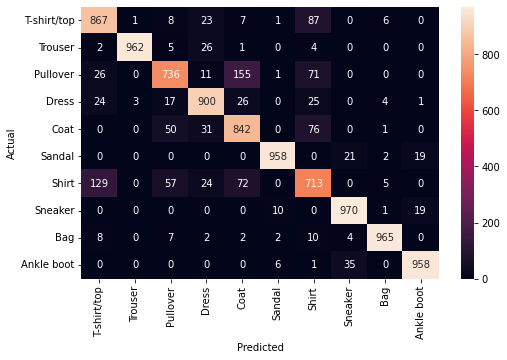

In [22]:
final_pred = np.argmax(model_3.predict(X_test), axis  = -1)
metrics_score(testY, final_pred)

#### **Observations:**
- The precision and recall for class 6 (shirt) have increased. The confusion matrix shows that the model is still not able to differentiate between T-shirt/top and shirts but became better in differentiating shirts with Pullover and Coat.
- The model has become even better at identifying trousers. It has an f1-score of 98% for class 1 (Trousers).
- The overall accuracy on the test data is 89%, which is approximately the same as the validation accuracy.

#### **Visualizing the images from the test data.**
- Randomly select 24 images from the test data and visualize them.
- The title of each image would show the actual and predicted label of that image and the probability of the predicted class.
- Higher the probability more confident the model is about the prediction.

313/313 [==============================] - 1s 3ms/step


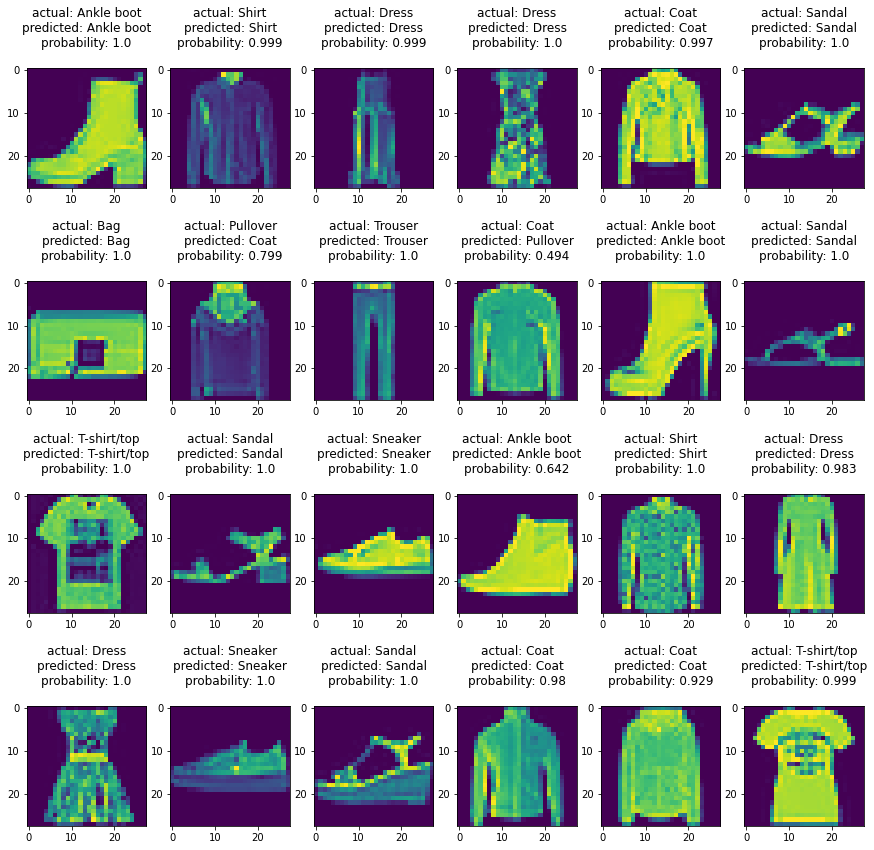

In [23]:
rows = 4
cols = 6

fig = plt.figure(figsize = (15, 15))

for i in range(cols):

    for j in range(rows):

        random_index = np.random.randint(0, len(testY))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test[random_index, :])

        pred_label = class_names_list[final_pred[random_index]]
        true_label = class_names_list[testY[random_index]]

        y_pred_test_max_probas = np.max(model_3.predict(X_test), axis=1)
        pred_proba = y_pred_test_max_probas[random_index]

        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
        
plt.show()

## **Conclusion**
- We have trained 3 different models with some changes.
- The plots track the variation in the accuracies and the loss across epochs and allow us to map how better do these models generalize.
- We have observed good performance on the train set but there is some amount of overfitting in the models that get more prominent as we increase the epochs.
- We went ahead with model 3 and evaluated the test data on it. We got an accuracy score of 89% with the classification report describing the class-wise recall and precision.
- Finally, we visualized some of the images from the test data.